In [2]:
config = {
    'mode': 'train',
    'use_ray': False,
    'results_dir': '/notebooks/outputs',
    'model': 'dropout_net',
    'batch_size': 128,
    'epochs': 50,
    'lr': 0.0001,
    'momentum': 0.99,
    'max_norm_constraint': 3,
    'drop_prob': 0.5}

In [3]:
# FIXME - OverflowError: cannot serialize a string larger than 4GiB (Error while saving the model)
# from ray.train.torch import TorchTrainer
# from ray.air.config import ScalingConfig, CheckpointConfig, RunConfig


# from metorch.train import train

# run_config = RunConfig(
#     local_dir=config['results_dir'], 
#     checkpoint_config=CheckpointConfig(num_to_keep=1))
# scaling_config=ScalingConfig(
#     num_workers=1, 
#     use_gpu=True, 
#     resources_per_worker={'CPU' :1, 'GPU': 1})

# trainer = TorchTrainer(
#     train, 
#     train_loop_config=config, 
#     scaling_config=scaling_config, 
#     run_config=run_config)

# results = trainer.fit()

2022-09-10 17:39:28,784	WARNING utils.py:607 -- Ray currently does not support initializing Raywith fractional cpus. Your num_cpus will be truncated from 5.985 to 5.
2022-09-10 17:39:28,944	INFO worker.py:1518 -- Started a local Ray instance.


Trial name,status,loc
TorchTrainer_86006_00000,ERROR,10.42.90.206:2734
Trial name,# failures,error file
TorchTrainer_86006_00000,1,/notebooks/outputs/TorchTrainer_2022-09-10_17-39-29/TorchTrainer_86006_00000_0_2022-09-10_17-39-30/error.txt


(RayTrainWorker pid=2768) 2022-09-10 17:39:35,795	INFO config.py:72 -- Setting up process group for: env:// [rank=0, world_size=1]


(RayTrainWorker pid=2768) Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


 96%|█████████▌| 163617792/170498071 [00:12<00:00, 80419187.54it/s]
170499072it [00:12, 13133861.22it/s]                               


(RayTrainWorker pid=2768) Extracting ./data/cifar-10-python.tar.gz to ./data


(RayTrainWorker pid=2768) 2022-09-10 17:40:27,451	INFO train_loop_utils.py:300 -- Moving model to device: cuda:0
(TorchTrainer pid=2734) 2022-09-10 17:41:29,908	ERROR function_trainable.py:298 -- Runner Thread raised error.
(TorchTrainer pid=2734) Traceback (most recent call last):
(TorchTrainer pid=2734)   File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 289, in run
(TorchTrainer pid=2734)     self._entrypoint()
(TorchTrainer pid=2734)   File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 365, in entrypoint
(TorchTrainer pid=2734)     self._status_reporter.get_checkpoint(),
(TorchTrainer pid=2734)   File "/opt/conda/lib/python3.7/site-packages/ray/util/tracing/tracing_helper.py", line 466, in _resume_span
(TorchTrainer pid=2734)     return method(self, *_args, **_kwargs)
(TorchTrainer pid=2734)   File "/opt/conda/lib/python3.7/site-packages/ray/train/base_trainer.py", line 460, in _trainable_func
(Tor

Result for TorchTrainer_86006_00000:
  date: 2022-09-10_17-39-33
  experiment_id: b9d36b87902944af8b5ef8d458429d8d
  hostname: n222fua9zr
  node_ip: 10.42.90.206
  pid: 2734
  timestamp: 1662831573
  trial_id: '86006_00000'
  


2022-09-10 17:41:30,143	ERROR tune.py:754 -- Trials did not complete: [TorchTrainer_86006_00000]
2022-09-10 17:41:30,144	INFO tune.py:759 -- Total run time: 120.21 seconds (119.80 seconds for the tuning loop).


RayTaskError(OverflowError): [36mray::TrainTrainable.train()[39m (pid=2734, ip=10.42.90.206, repr=TorchTrainer)
  File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/trainable.py", line 347, in train
    result = self.step()
  File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 417, in step
    self._report_thread_runner_error(block=True)
  File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 589, in _report_thread_runner_error
    raise e
  File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 289, in run
    self._entrypoint()
  File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 365, in entrypoint
    self._status_reporter.get_checkpoint(),
  File "/opt/conda/lib/python3.7/site-packages/ray/train/base_trainer.py", line 460, in _trainable_func
    super()._trainable_func(self._merged_config, reporter, checkpoint_dir)
  File "/opt/conda/lib/python3.7/site-packages/ray/tune/trainable/function_trainable.py", line 684, in _trainable_func
    output = fn()
  File "/opt/conda/lib/python3.7/site-packages/ray/train/base_trainer.py", line 375, in train_func
    trainer.training_loop()
  File "/opt/conda/lib/python3.7/site-packages/ray/train/data_parallel_trainer.py", line 358, in training_loop
    for results in training_iterator:
  File "/opt/conda/lib/python3.7/site-packages/ray/train/trainer.py", line 762, in __next__
    self._finish_training
  File "/opt/conda/lib/python3.7/site-packages/ray/train/trainer.py", line 722, in _run_with_error_handling
    return func()
  File "/opt/conda/lib/python3.7/site-packages/ray/train/trainer.py", line 833, in _finish_training
    return self._backend_executor.finish_training()
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/backend_executor.py", line 458, in finish_training
    results = self.get_with_failure_handling(futures)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/backend_executor.py", line 477, in get_with_failure_handling
    success = check_for_failure(remote_values)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/utils.py", line 52, in check_for_failure
    ray.get(object_ref)
ray.exceptions.RayTaskError(OverflowError): [36mray::RayTrainWorker._RayTrainWorker__execute()[39m (pid=2768, ip=10.42.90.206, repr=<ray.train._internal.worker_group.RayTrainWorker object at 0x7f0309517350>)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/worker_group.py", line 26, in __execute
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/backend_executor.py", line 449, in end_training
    output = session.finish()
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/session.py", line 140, in finish
    func_output = self.training_thread.join()
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/utils.py", line 98, in join
    raise self.exc
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/utils.py", line 91, in run
    self.ret = self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/utils.py", line 155, in <lambda>
    return lambda: wrapped_train_func(config)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/utils.py", line 141, in discard_return_wrapper
    train_func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/metorch/train.py", line 72, in train
    session.report({'training_loss':training_loss, 'validation_loss':validation_loss, 'validation_metric':validation_metric}, checkpoint=checkpoint)
  File "/opt/conda/lib/python3.7/site-packages/ray/air/session.py", line 61, in report
    _get_session().report(metrics, checkpoint=checkpoint)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/session.py", line 26, in report
    self._session.report(metrics, checkpoint)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/session.py", line 265, in report
    self.checkpoint(**checkpoint_dict)
  File "/opt/conda/lib/python3.7/site-packages/ray/train/_internal/session.py", line 251, in checkpoint
    kwargs = self._encode_data_fn(self._auto_fill_checkpoint_metrics(kwargs))
  File "/opt/conda/lib/python3.7/site-packages/ray/train/torch/config.py", line 178, in encode_data
    torch.save(data_dict, _buffer)
  File "/opt/conda/lib/python3.7/site-packages/torch/serialization.py", line 379, in save
    _save(obj, opened_zipfile, pickle_module, pickle_protocol)
  File "/opt/conda/lib/python3.7/site-packages/torch/serialization.py", line 484, in _save
    pickler.dump(obj)
OverflowError: cannot serialize a string larger than 4GiB

In [3]:
from metorch.train import train
train(config)

Files already downloaded and verified
Init loss:  2.309780995304973
Epoch: 0 Training loss: 2.1217980769495615  Validation loss: 1.8779811542245406 Validation metric: 0.27668566838644787
Epoch: 1 Training loss: 1.7013705888876138  Validation loss: 1.5545932824098612 Validation metric: 0.4023236057604257
Epoch: 2 Training loss: 1.4585841943661626  Validation loss: 1.3765415783169903 Validation metric: 0.48170198578795476
Epoch: 3 Training loss: 1.3148886212906516  Validation loss: 1.244624259351175 Validation metric: 0.5420220417700005
Epoch: 4 Training loss: 1.1977621516861474  Validation loss: 1.1616424148595785 Validation metric: 0.5750893374345842
Epoch: 5 Training loss: 1.0898273842403303  Validation loss: 1.1125543034529384 Validation metric: 0.5911957626789411
Epoch: 6 Training loss: 1.0270658411537876  Validation loss: 1.039276382591151 Validation metric: 0.6240077497430566
Epoch: 7 Training loss: 0.9543905174389434  Validation loss: 0.9698334374005282 Validation metric: 0.64695

FileNotFoundError: [Errno 2] No such file or directory: 'notebooks/model.pth'

In [8]:
import os
from metorch.test import test
from metorch.models import Net
from metorch.utils import get_dataloaders

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config['mode'] = 'test'
model = Net()
model.load_state_dict(torch.load(os.path.join(config['results_dir'], 'model.pth')))
model = model.to(device)
model.eval()
test_loader = get_dataloaders(config)
test_loss, test_metric = test(model, nn.CrossEntropyLoss(), test_loader)
print(test_loss, test_metric)

Files already downloaded and verified
1.3225405827353272 0.7599183251145724


<AxesSubplot:>

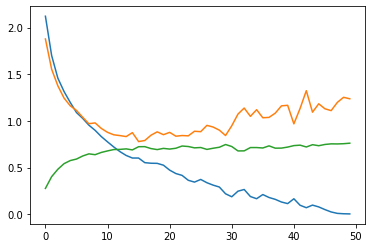

In [16]:
import seaborn
import pandas as pd

progress = pd.read_csv(os.path.join(config['results_dir'], 'progress.csv'))
progress[' Training Loss'].plot()
progress[' Validation Loss'].plot()
progress[' Validation metric'].plot()